Epoch 1/10


100%|██████████| 56000/56000 [00:02<00:00, 21868.63it/s, train_loss=0.3949, val_loss=0.3601]


Epoch 2/10


100%|██████████| 56000/56000 [00:02<00:00, 22034.59it/s, train_loss=0.4041, val_loss=0.5155]


Epoch 3/10


100%|██████████| 56000/56000 [00:02<00:00, 21275.59it/s, train_loss=1.0491, val_loss=1.2058]


Epoch 4/10


100%|██████████| 56000/56000 [00:02<00:00, 21808.79it/s, train_loss=1.7625, val_loss=1.9143]


Epoch 5/10


100%|██████████| 56000/56000 [00:02<00:00, 21943.21it/s, train_loss=1.8498, val_loss=1.9080]


Epoch 6/10


100%|██████████| 56000/56000 [00:02<00:00, 21649.24it/s, train_loss=1.8041, val_loss=1.8094]


Epoch 7/10


100%|██████████| 56000/56000 [00:02<00:00, 21907.41it/s, train_loss=1.8112, val_loss=1.8332]


Epoch 8/10


100%|██████████| 56000/56000 [00:02<00:00, 21423.38it/s, train_loss=1.8360, val_loss=1.7512]


Epoch 9/10


100%|██████████| 56000/56000 [00:02<00:00, 21870.55it/s, train_loss=1.8044, val_loss=1.8144]


Epoch 10/10


100%|██████████| 56000/56000 [00:02<00:00, 21023.80it/s, train_loss=1.8481, val_loss=1.9117]


Test accuracy: 0.2585


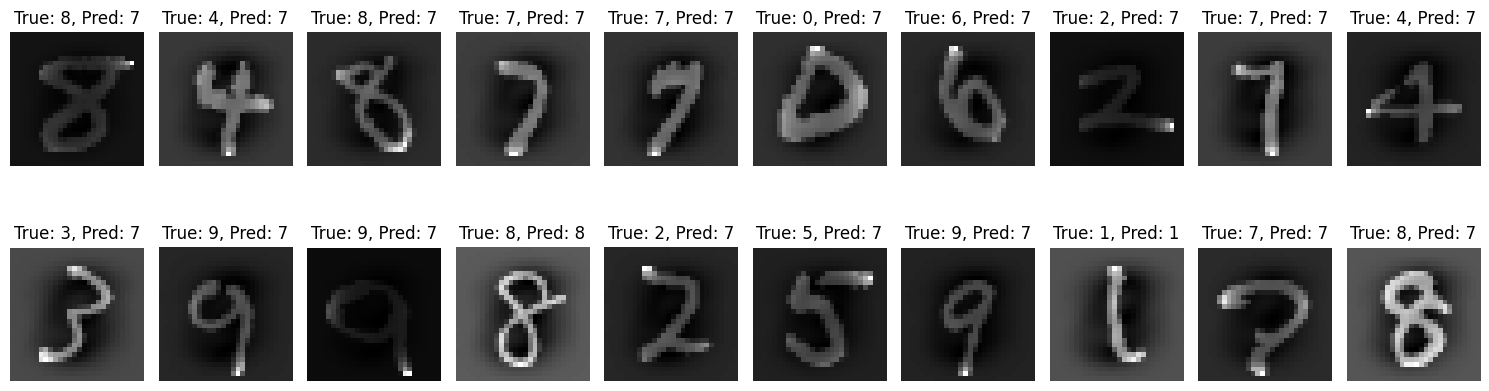

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Import from the previous FFNN implementation
from activation import Linear, ReLU, Sigmoid, Tanh, Softmax
from loss import MeanSquaredError, BinaryCrossEntropy, CategoricalCrossEntropy
from initialization import ZeroInitialization, UniformInitialization, NormalInitialization, XavierInitialization
from layer import Layer
from model import FFNN

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Normalize pixel values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define network architecture for MNIST
layer_sizes = [784, 128, 64, 10]  # Input: 784 pixels, two hidden layers, 10 output classes

# Define activation functions
activations = [
    ReLU(),       # First hidden layer
    ReLU(),       # Second hidden layer
    Softmax()     # Output layer (for multi-class classification)
]

# Use Categorical Cross Entropy for multi-class classification
loss_function = CategoricalCrossEntropy()

# Define weight initializer
initializations = [
    XavierInitialization(),  # First hidden layer
    XavierInitialization(),  # Second hidden layer
    XavierInitialization()     # Output layer (weights initialized to zero)
]

# Create the model
model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss=loss_function,
    initializations=initializations
)

# Train the model
history = model.train(
    x_train=X_train,
    y_train=y_train,
    batch_size=64,
    learning_rate=0.01,
    epochs=10,
    x_y_val=(X_test, y_test),
    verbose=1
)

# # Plot training history
# plt.figure(figsize=(10, 6))
# plt.plot(history['train_loss'], label='Training Loss')
# plt.plot(history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

# # Visualize model architecture
# model.plot_model()

# # Plot weight distributions
# model.plot_weight_distribution()

# # Plot gradient distributions
# model.plot_gradient_distribution()

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f"Test accuracy: {accuracy:.4f}")

# Visualize 20 predictions
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Save the model
model.save("mnist_ffnn_model.pkl")

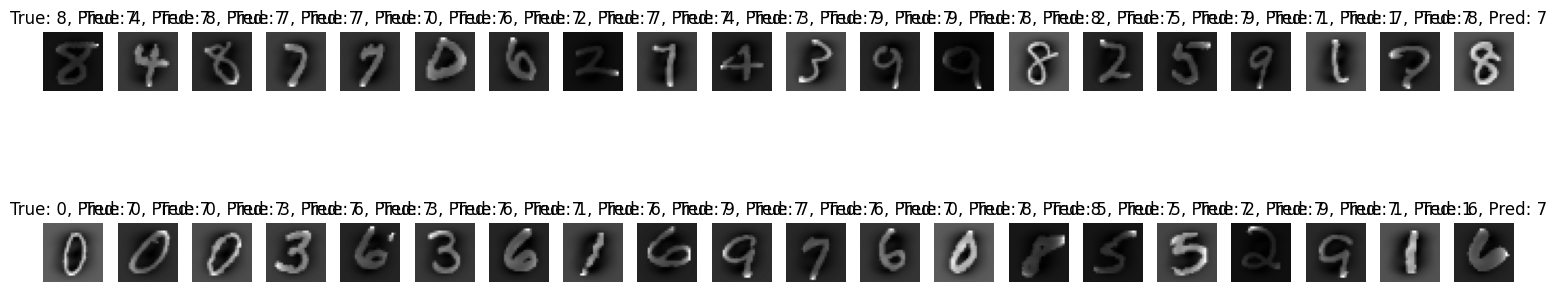

In [12]:
plt.figure(figsize=(15, 5))
for i in range(40):
    plt.subplot(2, 20, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, classification_report
# import sys
# sys.path.append('.')  # Pastikan path ke modul Anda benar

# # Import kelas-kelas yang Anda definisikan sebelumnya
# from activation import Linear, ReLU, Sigmoid, Tanh, Softmax
# from loss import MeanSquaredError, BinaryCrossEntropy, CategoricalCrossEntropy
# from initialization import XavierInitialization
# from layer import Layer
# from model import FFNN

# # Fetch the MNIST dataset
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist.data.astype(np.float32), mnist.target.astype(np.int64)

# # One-hot encode labels
# y_onehot = np.zeros((len(y), 10))
# y_onehot[np.arange(len(y)), y.astype(int)] = 1

# # Normalize the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# # Definisikan arsitektur model
# layer_sizes = [784, 10, 10, 10]  # sesuaikan dengan sklearn
# activations = [ReLU(), ReLU(), Softmax()]
# initializations = [
#     XavierInitialization(),
#     XavierInitialization(),
#     XavierInitialization()
# ]

# # Inisialisasi model FFNN
# model = FFNN(
#     layer_sizes=layer_sizes, 
#     initializations=initializations, 
#     activations=activations, 
#     loss=CategoricalCrossEntropy()
# )

# # Training
# history = model.train(
#     x_train=X_train, 
#     y_train=y_train, 
#     x_y_val=(X_test, y_test),
#     batch_size=16, 
#     learning_rate=0.01, 
#     epochs=10, 
#     verbose=1
# )

# # Predict on test data
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)

# # Evaluate model
# accuracy = accuracy_score(y_test_classes, y_pred_classes)
# print(f'Accuracy: {accuracy:.4f}')
# print(classification_report(y_test_classes, y_pred_classes))

# # Display some predictions in CLI
# for i in range(5):
#     print(f'predicted: {y_pred_classes[i]}')

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype(np.float32), mnist.target.astype(np.int64)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define FFNN model using sklearn
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam',
                    batch_size=16, max_iter=10, random_state=42, verbose=True)

# Train the model
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# # Display some predictions in cli only
# for i in range(5):
#     print(f'predicted: {y_pred[i]}')


fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {y_pred[i]}')
    ax.axis('off')
plt.show()
